# Logistic Regression

### Data preprocessing

In [1]:
# Import the dataset
dataset = read.csv('Wine.csv')

In [2]:
head(dataset, 10)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
# Splitting the dataset into the Training set and Test set
library(caTools)
set.seed(42)
split = sample.split(dataset$Customer_Segment, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
head(training_set, 10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
7,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
8,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
9,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
10,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
11,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
12,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1


In [5]:
head(test_set, 10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1
16,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310,1
17,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,1
23,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,1
24,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,1
28,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285,1
39,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,1
44,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,1


In [6]:
# Feature Scaling
training_set[-14] = scale(training_set[-14])
test_set[-14] = scale(test_set[-14])

In [7]:
head(training_set, 10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
3,0.1602503,0.02920144,1.0599642,-0.2868182,0.0636817,0.7391182,1.1443635,-0.5035995,1.9834854,0.203958271,0.3044434,0.8016402,1.36880749,1
4,1.6217267,-0.33641320,0.4561998,-0.8108407,0.8734848,2.3206701,1.3848614,-0.9928433,0.9181480,1.077228035,-0.4346218,1.2090177,2.30398291,1
5,0.2568769,0.23430234,1.7702753,0.4118784,1.2109028,0.7391182,0.6152681,0.2302661,0.3093837,-0.356252521,0.3479179,0.4524595,-0.05773129,1
6,1.4163953,-0.50584437,0.2786220,-1.2766385,0.8060013,1.4470510,1.2886622,-0.1774370,0.5630355,0.644712350,0.3913923,0.3360659,2.20888033,1
7,1.6458833,-0.40775264,0.2786220,-1.4513126,-0.2737363,0.2872463,0.4517296,-0.5035995,0.5799456,0.026832800,0.2609690,1.3981572,1.70166654,1
8,1.2472989,-0.15806459,0.8468709,-0.5779418,1.4133536,0.4378703,0.4421096,-0.4220589,-0.6544930,-0.055551140,0.4348667,1.3981572,1.71751697,1
9,2.1773293,-0.61285354,-0.7158135,-1.6259868,-0.2062527,0.7391182,0.8942457,-0.5851401,0.5799456,0.006236815,0.5218156,0.3360659,0.92499543,1
10,1.0057325,-0.87145901,-0.3606579,-1.0437396,-0.1387691,1.0102414,1.0577842,-1.1559245,0.3601141,0.838314609,0.2174946,1.3545096,0.92499543,1
11,1.2956121,-0.14914716,-0.2541113,-0.4614924,0.3336161,0.9650542,1.2213228,-1.1559245,1.2563503,0.232792650,1.2608808,0.8016402,2.39908550,1
12,1.3197688,-0.75553242,-0.1830802,-0.8108407,-0.3412199,-0.1646256,0.3651503,-0.8297620,-0.1133692,-0.076147125,0.9130854,0.2924183,1.66996568,1


In [8]:
head(test_set, 10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
1,1.78805975,-0.5938179,0.33815204,-1.1995090,2.36679618,1.2505581,1.3477301,-0.6173616,1.94532302,0.6130703,0.4098639,1.66502450,1.0857020,1
2,0.40822093,-0.5310486,-0.83861705,-2.6908923,0.12456822,0.9160849,0.9848409,-0.7675306,-0.28456175,-0.1008930,0.4541735,1.01755340,1.0382261,1
13,1.14502807,-0.5758838,0.25699555,-1.0639287,-0.78893206,0.8045938,0.9848409,-0.5422771,0.88557580,0.5904048,0.8972696,0.39498504,1.8927911,1
16,0.98427015,-0.5041474,1.43376463,-0.6571878,1.12111398,1.3620492,1.1662855,-0.4671926,0.11284345,1.5536885,1.4732946,0.37008230,1.8611406,1
17,1.88183521,-0.4055099,1.51492112,0.2918743,1.78547782,1.2505581,1.4445005,-0.2419390,1.23882487,0.9303873,0.5427927,0.08370086,1.7661889,1
23,1.09144209,-0.4593122,0.05410433,-0.8605583,0.20761370,0.8268921,1.1299966,-0.6924461,0.62063899,-0.4295427,0.7200312,1.76463544,0.9907503,1
24,-0.06065635,-0.6924555,0.70335623,-0.4538174,-0.29065918,0.5370153,0.5130850,-0.7675306,0.11284345,-0.3558798,0.6314120,1.30393485,0.9274492,1
28,0.54218586,-0.5848509,-0.83861705,-0.7249780,-0.37370466,0.3586296,0.2953515,-0.6924461,-0.13001528,-0.3445471,0.3212447,0.23311726,1.7820142,1
39,0.23406651,-0.7821260,-1.00093002,-1.2334041,-0.04152274,0.3586296,0.8396852,-0.6173616,-0.08585915,-0.4862064,1.0301985,0.13350633,0.9432745,1
44,0.46180690,1.4417023,-0.22994338,-0.5555026,0.37370466,0.8937867,0.8275889,-0.3170235,0.55440479,-0.1122257,-0.5649475,0.51949871,-0.1328444,1


### Applying Principal Component Analysis

In [9]:
library(caret)
library(e1071)

Loading required package: lattice
Loading required package: ggplot2


In [10]:
pca  = preProcess(x = training_set[-14], 
                  method = 'pca', 
                  pcaComp = 2)

training_set = predict(pca, training_set)

In [11]:
head(training_set, 10)

,Customer_Segment,PC1,PC2
3,1,-2.4042786,0.9951710
4,1,-3.5522606,2.7194629
5,1,-0.9232596,0.7658849
6,1,-2.8555758,2.0771730
7,1,-2.3265543,1.1842124
8,1,-1.9594226,1.5348800
9,1,-2.3353504,0.9332457
10,1,-2.6227366,0.7882650
11,1,-3.3298910,1.2803519
12,1,-1.6550554,0.5967219


In [12]:
training_set = training_set[c(2, 3, 1)] # Reordering the columns

In [13]:
head(training_set, 10)

,PC1,PC2,Customer_Segment
3,-2.4042786,0.9951710,1
4,-3.5522606,2.7194629,1
5,-0.9232596,0.7658849,1
6,-2.8555758,2.0771730,1
7,-2.3265543,1.1842124,1
8,-1.9594226,1.5348800,1
9,-2.3353504,0.9332457,1
10,-2.6227366,0.7882650,1
11,-3.3298910,1.2803519,1
12,-1.6550554,0.5967219,1


In [14]:
test_set = predict(pca, test_set)
test_set = test_set[c(2, 3, 1)] # Reordering the columns

In [15]:
head(test_set, 10)

,PC1,PC2,Customer_Segment
1,-3.8448036,2.07830374,1
2,-2.5671066,0.04189171,1
13,-2.4838927,1.13038798,1
16,-2.7059134,2.29942022,1
17,-2.6784093,2.93157009,1
23,-2.8952275,0.30215230,1
24,-1.9076388,-0.21055905,1
28,-1.4860269,0.15312111,1
39,-1.8331723,-0.55312316,1
44,-0.8553104,0.68278627,1


### Fitting classifier to the Training set

In [16]:
classifier = svm(formula = Customer_Segment ~ ., 
                 data = training_set, 
                 type = 'C-classification', 
                 kernel = 'radial')

### Predicting the Test set results

In [17]:
y_pred = predict(classifier, newdata = test_set[-3])

In [18]:
head(y_pred, 10)

1  2 13 16 17 23 24 28 39 44 
 1  1  1  1  1  1  1  1  2  1 
Levels: 1 2 3

In [19]:
head(test_set[3], 10)

,Customer_Segment
1,1
2,1
13,1
16,1
17,1
23,1
24,1
28,1
39,1
44,1


### Making the Confusion Matrix

In [20]:
cm = table(test_set[, 3], y_pred)

In [21]:
cm

   y_pred
     1  2  3
  1 11  1  0
  2  0 14  0
  3  0  0 10

* * *

**classifier made 11 + 14 + 10 = 35 correct prediction and 1 incoreect prediction.**

* * *

### Visualizing the Training set results

In [22]:
# install.packages('ElemStatLearn')
library(ElemStatLearn)

In [23]:
set = training_set

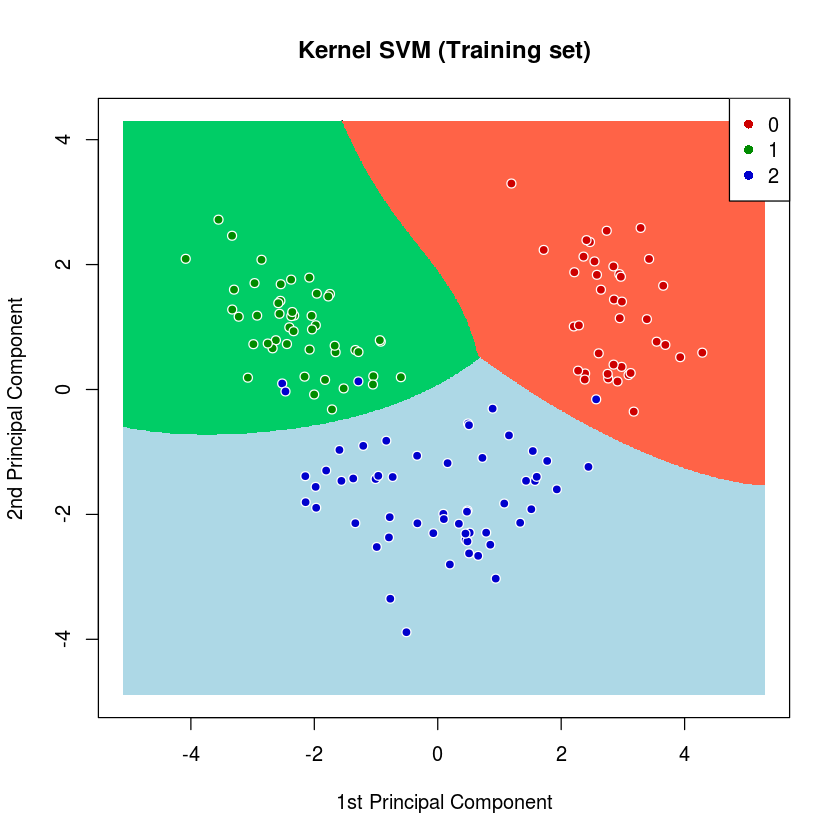

In [24]:
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Kernel SVM (Training set)',
     xlab = '1st Principal Component', ylab = '2nd Principal Component',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'lightblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')), col='white')
legend("topright", legend = c("0", "1", "2"), pch = 16, col = c('red3', 'green4', 'blue3'))

### Visualizing the Test set results

In [25]:
set = test_set

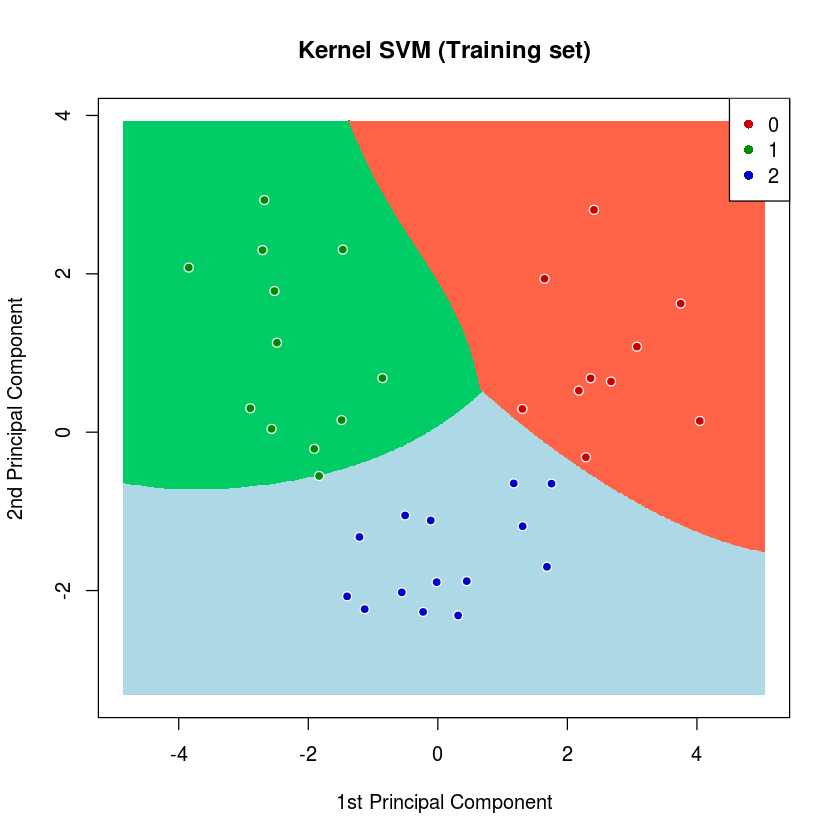

In [27]:
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Kernel SVM (Training set)',
     xlab = '1st Principal Component', ylab = '2nd Principal Component',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'lightblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')), col='white')
legend("topright", legend = c("0", "1", "2"), pch = 16, col = c('red3', 'green4', 'blue3'))